# Predict Customer Churned

- Ilani Dayana Binti Noor Azman
- Assessment 2

This case is only focused on current churned of the customer and predict which customer is highly to cancel the service. A high churn rate can negatively impact Monthly Recurring Revenue (MRR) and can also indicate dissatisfaction with a product or service. By analysis the customer who is highly in current churned will improve the customer retention rate by preventing current customers from leaving and keeping potential customers from becoming competitors' new customers. In addition, it can also help businesses understand why they are losing customers to make changes to their business.

Objectives:
    i) To detecting which customers are likely to leave a service or to cancel a subscription to a service. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Exploratory Data Analysis

In [2]:
#Dataset
df = pd.read_csv("telco_churn.csv")
df.shape

(1477, 15)

In [4]:
df.isna().sum().sum()

0

There is no missing value in the data set so we can jump to explore it. We can start with the target variable:

In [5]:
df.CHURNED.value_counts()

Current    832
Vol        513
InVol      132
Name: CHURNED, dtype: int64

In [6]:
df

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
0,0,5.246,7.515,86.328,0,CH,FreeLocal,Standard,57,F,M,2,27535.3,Y,Vol
1,3,0.000,0.000,3.942,0,CC,Budget,Intnl_discount,50,F,S,2,64632.3,N,InVol
2,4,5.556,0.000,9.363,1,CC,Budget,Intnl_discount,68,F,M,2,81000.9,N,Vol
3,8,14.019,5.680,29.806,0,CC,Budget,Standard,34,M,S,0,87467.1,Y,Current
4,10,13.664,2.956,32.638,0,CC,FreeLocal,Intnl_discount,60,M,M,2,83220.6,N,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,4991,0.000,0.000,0.731,0,CC,FreeLocal,Standard,75,F,M,0,41138.2,N,InVol
1473,4993,0.000,0.000,1.107,0,CC,FreeLocal,Standard,95,F,S,2,52997.5,Y,Vol
1474,4996,9.082,7.040,13.040,0,CH,FreeLocal,Standard,70,F,M,1,85192.9,Y,Vol
1475,4998,22.622,0.000,25.763,0,CC,Budget,Standard,37,M,M,0,11693.3,N,Current


## 1.1 Binary Categorical Features

In [7]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='LongDistanceBillType', ylabel='count'>

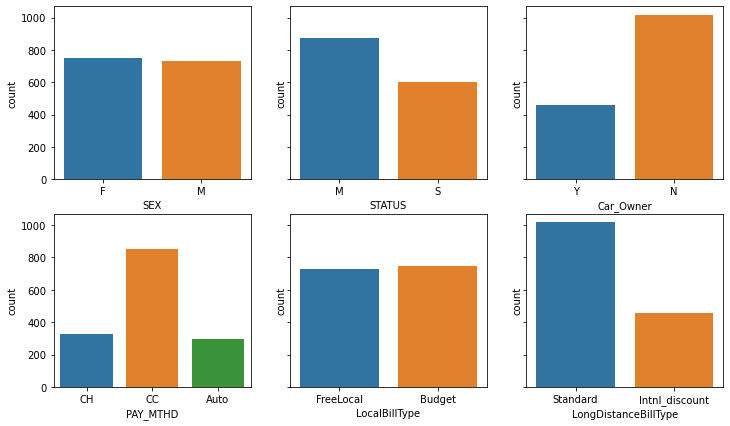

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("SEX", data=df, ax=axes[0,0])
sns.countplot("STATUS", data=df, ax=axes[0,1])
sns.countplot("Car_Owner", data=df, ax=axes[0,2])
sns.countplot("PAY_MTHD", data=df, ax=axes[1,0])
sns.countplot("LocalBillType", data=df, ax=axes[1,1])
sns.countplot("LongDistanceBillType", data=df, ax=axes[1,2])

## 1.2 Change the values of target variable into numeric

In [9]:
churn_numeric = {'Current':0, 'Vol':1, 'InVol':2}
df.CHURNED.replace(churn_numeric, inplace=True)

## 1.3 Continuous Features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHILDREN', ylabel='Density'>

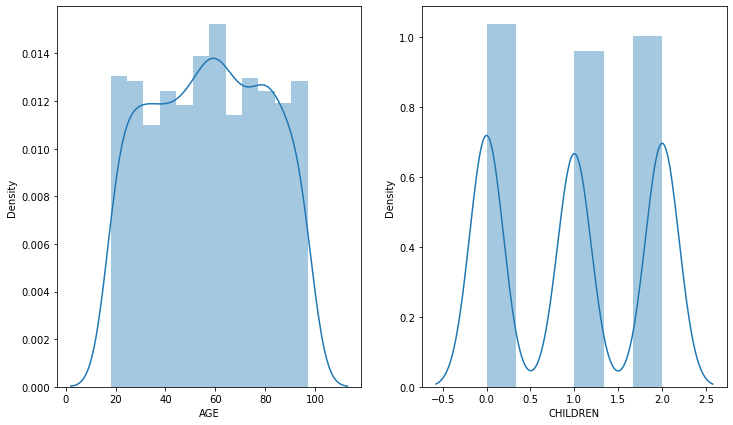

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["AGE"], ax=axes[0])
sns.distplot(df["CHILDREN"], ax=axes[1])

Remarks:
- According to the distribution of tenure variable, most of the customers are age mostly in 55-60.
- There seems to be a gap between low rates and high rates for children seem like customer with no children has the highest freqeuncy.

### 1.3.1 Churned By Age and Children

In [11]:
df[['AGE','CHILDREN','CHURNED']].groupby('CHURNED').mean()

,AGE,CHILDREN
CHURNED,,
0,56.429087,1.006010
1,59.113060,0.968811
2,58.681818,0.962121


Remarks:
- It is clear that people who age 56 with 1 children is in current churned while people age 59 with no children in Vol churned, and people age 58 with no children is invol churned. 

### 1.3.2 Churned By Est_Income and LongDist

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LONGDIST', ylabel='Density'>

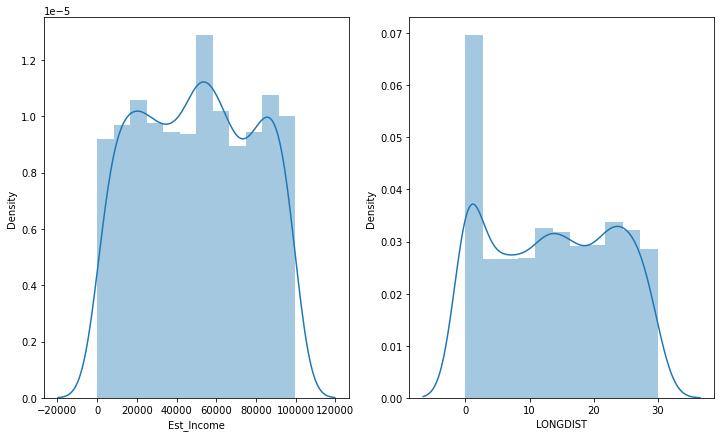

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["Est_Income"], ax=axes[0])
sns.distplot(df["LONGDIST"], ax=axes[1])

In [36]:
df[['Est_Income','LONGDIST','CHURNED']].groupby('CHURNED').mean()

,Est_Income,LONGDIST
CHURNED,,
0,52042.868135,15.042312
1,48366.650984,14.867554
2,46724.190000,0.000000


Remarks:
- Customer Est_Income around 52042 with LongDist 15 has mostly current churned.
- Customer Est_Income around 48366 with LongDist 14 has vol churned.
- Customer Est_Income around 46724 with LongDist 0 has inVol churned.

### 1.3.3 Churned By International and Local

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOCAL', ylabel='Density'>

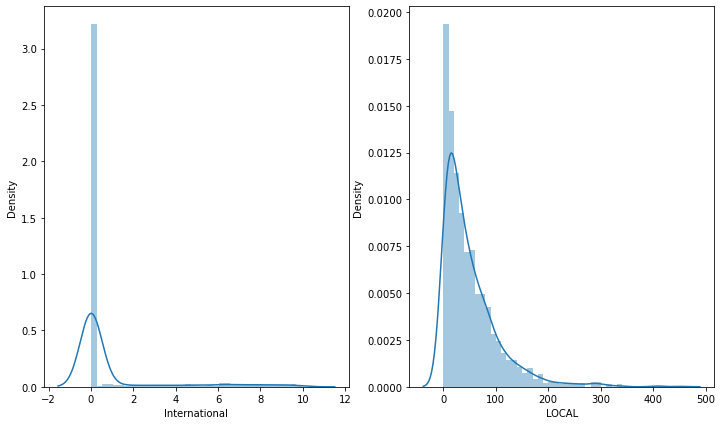

In [37]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["International"], ax=axes[0])
sns.distplot(df["LOCAL"], ax=axes[1])

In [38]:
df[['International','LOCAL','CHURNED']].groupby('CHURNED').mean()

,International,LOCAL
CHURNED,,
0,0.322213,55.561042
1,1.885483,57.122975
2,0.000000,2.533348


Remarks:

- International customer is current churned with 0.32213 while local customer current churned 55.561042. 
- International customer is vol churned with 1.885483 while local customer current churned 57.122975.
- International customer is invol churned with 0 while local customer current churned 2.533348.

# 2. Data Preprocessing

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:

In [14]:
df.drop(['ID','STATUS','Car_Owner','PAY_MTHD', 'LocalBillType', 'LongDistanceBillType'], axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## 2.1 Encoding categorical variables

In [16]:
cat_features = ['SEX']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

## 2.2 Scaling continuous variables

In [17]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['AGE']])
b = sc.fit_transform(df[['CHILDREN']])
X['AGE'] = a
X['CHILDREN'] = b

In [18]:
X.shape

(1477, 9)

## 2.3 Resampling

I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

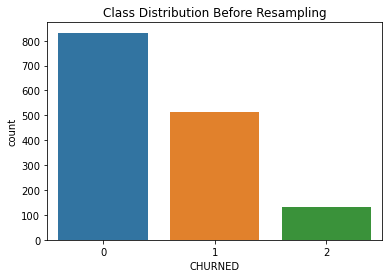

In [19]:
sns.countplot('CHURNED', data=df).set_title('Class Distribution Before Resampling')

## 2.4 Separating class (churn=Current, churn=Vol, churn=InVol )

In [20]:
X_Current = X[X.CHURNED == 0]
X_Vol = X[X.CHURNED == 1]
X_InVol = X[X.CHURNED == 2]

## 2.5 Using class (Churned=Current and Churned= Vol)

Based on the exploring the variables, I have decided not to use Vhurned=InVol variable because has ittle or no informative power to the model also

In [21]:
X_Vol_upsampled = X_Vol.sample(n=len(X_Current), replace=True, random_state=42)
print(len(X_Vol_upsampled))

832


## 2.6 Combining positive and negative class and checking class distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

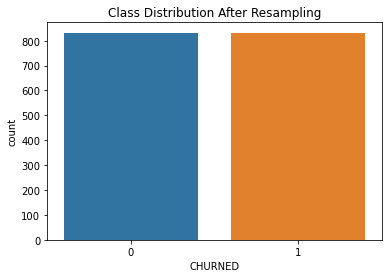

In [22]:
X_upsampled = X_Current.append(X_Vol_upsampled).reset_index(drop=True)
sns.countplot('CHURNED', data=X_upsampled).set_title('Class Distribution After Resampling')

# 3. Model Creation and Evaluation

In [23]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['CHURNED'], axis=1) #features (independent variables)
y = X_upsampled['CHURNED'] #target (dependent variable)

## 3.1 Dividing dataset into train and test subsets:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## 3.2 Ridge Classifier

In [25]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

### 3.2.1 Creating a ridge classifier object and training it:

In [26]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

### 3.2.2 Making predictions on training set and evaluating

In [27]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7851239669421488

### 3.2.3 Making predictions on training set and evaluating

In [28]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7927927927927928

Remarks:
- The model achieved 78% accuracy on training set and 79% accuracy on test set. 
- The model is not overfitting because accuracies on training and test sets are pretty close.
- However, 78% accuracy is not very good so we will try to get a better accuracy using a different model.

## 3.3 Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

### 3.3.1 Creating a random forest object and training it

In [30]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

Remarks:
- There are two parameters we need to mention here.
        i) n_estimators: The number of trees in the forest.
        ii) max_depth: The maximum depth of the tree.
        
- These parameters have critical roles in the accuracy of model and also preventing the model from overfitting. 
- In general, if we use deep trees (max_depth is very high), the model may end up overfitting.

### 3.3.2 Making predictions on training set and evaluating

In [31]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9579263711495116

### 3.3.3 Making predictions on test set and evaluating

In [32]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.9159159159159159

- The accuracy on training set is 4% higher than the accuracy on test set.

# 4. Improving the Model

In [33]:
from sklearn.model_selection import GridSearchCV

Remarks: 
GridSearchCV provides an easy way for parameter tuning. We can do cross-validation and try different parameters using GridSearchCV.

## 4.1 Creating a GridSearchCV object

In [34]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

Remarks:
- cv = 5 means having a 5-fold cross validation. 
- So dataset is divided into 5 subset. 
- At each iteration, 4 subsets are used in training and the other subset is used as test set.
- When 5 iteration completed, the model used all samples as both training and test samples.
- n_jobs parameter is used to select how many processors to use. 
- -1 means using all processors.

In [35]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

## 4.2 Check the best parameters and overall accuracy

In [39]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.8936231412135026

Remarks: 
- have achieved an overall accuracy of almost 90%. 
- This is the mean cross-validated score of the best_estimator. 
- In the previous random forest, the mean score was approximately 86% (95% on training and 91% on test).
- However using GridSearchCV, the model accuracy by is not improved.

# Conclusion

- Churn rate is a health indicator for subscription-based companies. The ability to identify customers that aren’t happy with provided solutions allows businesses to learn about product or pricing plan weak points, operation issues, as well as customer preferences and expectations to proactively reduce reasons for churn.
- Based on the prediction customer who are age around 56-60 with one children are susceptibility will stop doing business with the company.
- By using the Random Forest algorithm, the accuracy training set is 95.8% and testing set is 91.8% which is higher than Ridge Classifier and GridSearchCV. 